# Matplotlib & Seaborn

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- [Matplotlib Documentation](https://matplotlib.org/)
- [matplotlob.pyplot functions](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [seaborn functions](https://seaborn.pydata.org/api.html)

## Plot Types

 - **Univariate visualizations:** Visualize single-variables, such as bar charts, histograms, and line charts.
 - **Bivariate visualizations:** Plots representing the relationship between two variables measured on the given sample data. These plots help to identify the relationship pattern between the two variables.
 - **Ordinal data:** It is a categorical data type where the variables have natural and ordered categories. The distances between the categories are unknown, such as the survey options presented on a five-point scale.

### Univariate Visualization Functions

| Plot type | matplotlib.pyplot function | seaborn function |
|:-|:-|:-|
| Bar Chart | | countplot() barplot() |
| Pie Chart | pie() | |
| Histogram | hist() displot() histplot() | distplot() |

### Bivariate Visualization Functions

| Plot type | matplotlib.pyplot function | seaborn function |
| --- | --- | --- |
| Scatterplot | scatter() | regplot() |
| Heat Map | hist2d() | heatmap() |
| Violin Plot | --- | violinplot() |
| Box Plot | --- | boxplot() |
| Clustered Bar Chart | --- | countplot() heatmap() |
| Faceting | --- | FacetGrid() |
| Bar Plot | --- | barplot() |
| Point Plot | --- | pointplot() |
| Line Plot | errorbar() | --- |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

base_color = sb.color_palette()[1]

# allow charts to be drawn inside this notebook
%matplotlib inline

## Tidy data

A tidy dataset is a tabular dataset where:

- each variable is a column
- each observation is a row
- each type of observational unit is a table

[Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)


## Bar Chart

A **bar chart** depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

### Absolute vs Relative Frequency

- **absolute frequency** - pure counts
- **relative frequency** - *distribution of data* / *proportions of the whole*

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
print("Shape of Pokemon data is: ", pokemon.shape)

pokemon.head()

Shape of Pokemon data is:  (807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### Bar Charts with Seaborn

```py
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)
```

<AxesSubplot:xlabel='generation_id', ylabel='count'>

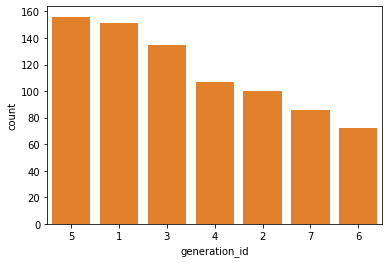

In [3]:

# sort data by occurance
order = pokemon['generation_id'].value_counts().index

sb.countplot(data = pokemon, x = 'generation_id', color=base_color, order=order)

<AxesSubplot:xlabel='count', ylabel='type_1'>

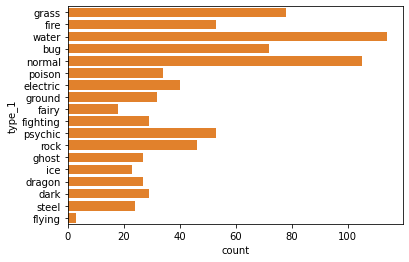

In [4]:
sb.countplot(data=pokemon, y='type_1', color=base_color)

### Bar Charts with Matplotlib

```py
matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)
```

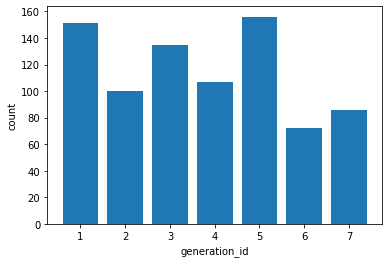

In [5]:
# the Series having unique values
x = pokemon['generation_id'].unique()

# the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

plt.show()

### Relative Plot

We will use the pandas.DataFrame.melt() method to unpivot a DataFrame from wide to long format, optionally leaving identifiers set. The syntax is:

```py
DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)
```

- `id_vars` - It is a tuple representing the column(s) to use as identifier variables.
- `value_vars` - It is tuple representing the column(s) to unpivot (remove, out of place).
- `var_name` - It is a name of the new column.
- `value_name` - It is a name to use for the ‘value’ of the columns that are unpivoted.

[See doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html)

In [6]:
# club the rows of both type_1 and type_2, so that the resulting dataframe has new column, type_level.
pokemon_types = pokemon.melt(id_vars=['id', 'species'], 
                                value_vars=['type_1', 'type_2'], 
                                var_name='type_level', 
                                value_name='type')

pokemon_types.head()                              

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [7]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pokemon_types['type'].value_counts()

print(type_counts[0:2])

# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index

# Returns the sum of all not-null values in `type` column
n_pokemon = pokemon_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon

# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)

# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

water     131
normal    109
Name: type, dtype: int64


Text(0.5, 0, 'proportion')

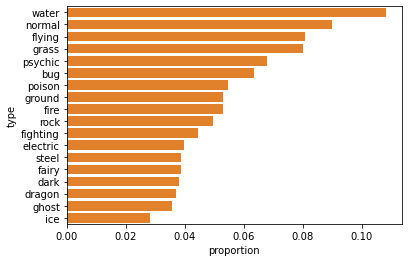

In [8]:
sb.countplot(data=pokemon_types, y='type', color=base_color, order=type_order)
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

## Pie Chart

A **pie chart** is a common univariate plot type that is used to depict **relative frequencies** for levels of a categorical variable.

```matplotlib.pyplot.pie(x_data, labels, colors, startangle, counterclock, wedgeprops)```


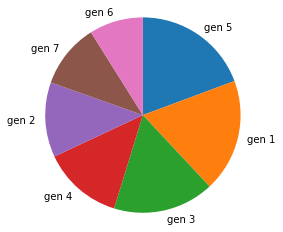

In [9]:
pie_gen_values = pokemon['generation_id'].value_counts()
pie_gen_labels = ["gen %d"%(gen) for gen in pie_gen_values.index]


plt.pie(pie_gen_values, labels = pie_gen_labels, startangle=90, counterclock=False)
plt.axis('square')
plt.show()

### Donut Plot


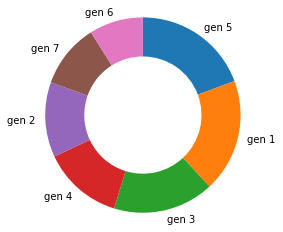

In [10]:
plt.pie(pie_gen_values, labels=pie_gen_labels, 
    startangle=90, counterclock=False, wedgeprops={'width': 0.4})
plt.axis('square')

plt.show()

## Histogram

A **histogram** is used to plot the **distribution of a numeric variable**. It's the **quantitative** version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number.

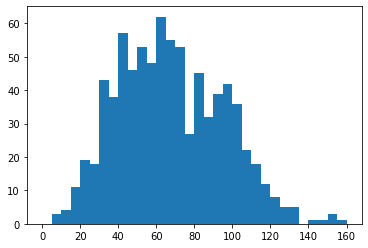

In [11]:
# make custom bins
bins = np.arange(0, pokemon['speed'].max()+5, 5)

plt.hist(data = pokemon, x = 'speed', bins = bins)

plt.show()

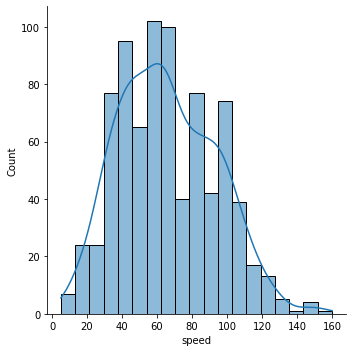

In [12]:
sb.displot(pokemon['speed'], kde=True)

### Axis Limits

Set the upper and lower bounds of the bins that are displayed in the plot

`matplotlib.pyplot.xlim(*args, **kwargs)` - Get or set the x limits of the current axes.


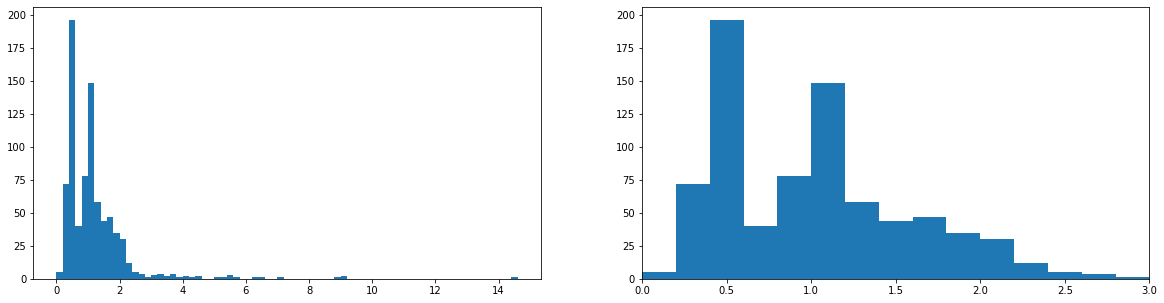

In [13]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='height', bins=bins)

plt.subplot(1, 2, 2)
plt.hist(data=pokemon, x='height', bins=bins)
plt.xlim((0,3))

plt.show()

## Scatter Plot

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the **scatterplot**. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.



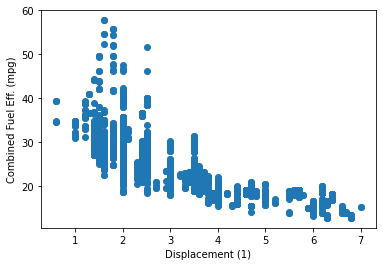

In [14]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head(10)

# Scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

plt.show()

<AxesSubplot:xlabel='year', ylabel='comb'>

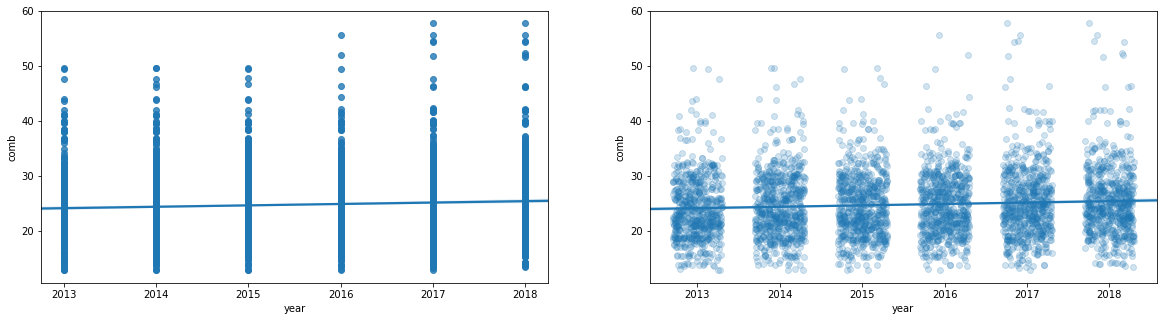

In [15]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False)


plt.subplot(1, 2, 2)
# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha': 0.2})

### Heat Map

A **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes.

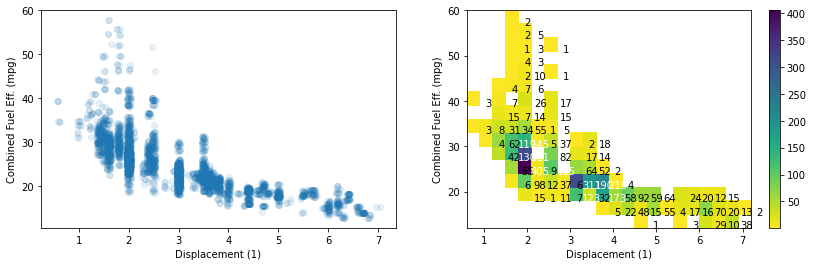

In [16]:
# PLOT ON LEFT
plt.figure(figsize=(14,4))


plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# PLOT ON RIGHT
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.subplot(1, 2, 2)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', bins = [bins_x, bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]


for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Violin & Box Plots

The **violin plot** is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram.

Compared to the violin plot, the **box plot** leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level.


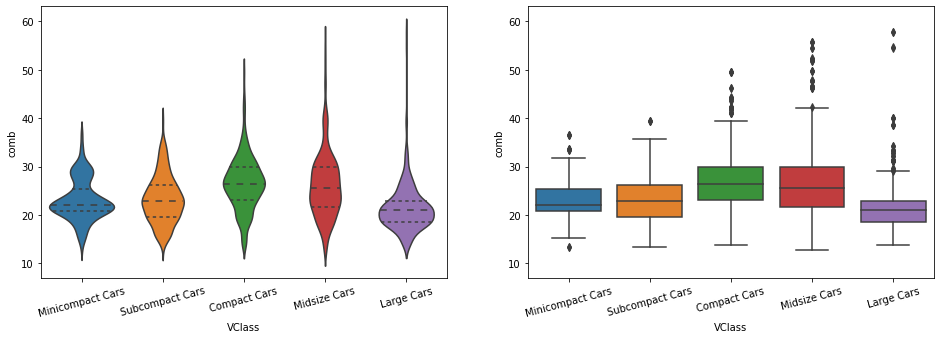

In [17]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

plt.figure(figsize = [16, 5])

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner='quartile')
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb')
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim())

plt.show()